# Problem Statement

The Board of Directors at TCB General Contractors are implementing a new marketing strategy to increase the company's revenue. To implement this new strategy, they want to discover which of their services are most impactful on increasing the value of the home. This information will be used to promote specific additions and renovations in the upcoming marketing plan.

My task is to discover which home services most dramatically effect the sales price.

As the output of my project will be the numeric 'Sale Price', I will use linear regression and multiple linear regression modeling algorithm to evaluate the data given to me.

The success of my modeles will be evaluated by the regression metric 𝑅2. I will use R2 as it is easily interpratable and does not depend on the scale of "Sales Price".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

#https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0#:~:text=Collinear%20features%20are%20features%20that,variance%20and%20less%20model%20interpretability.

In [2]:
train = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/train.csv')
test = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/test.csv')

# Data Cleaning & Exploring

In [3]:
train.shape, test.shape

((2051, 81), (878, 80))

In [4]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


**Checking Column Datatypes**

**Discovering what each column represents**

In [5]:
#
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

**TCB General Contracting services that corrilate to the data:**

- Complete home upgrade: 'Overall Cond', 'Overall Qual'

- 2nd floor addition: '2nd Flr SF', 'Bedroom AbvGr', 'MS SubClass'(060),'House Style':(2Story)(2.5Fin), 'Gr Liv Area',  'TotRmsAbvGrd'

- Basement Finish:'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',

- Kitchen Remodel:'Kitchen AbvGr', 'Kitchen Qual'

- Bathroom Addition: 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'

- Garage Addition: 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars','Garage Area', 'Garage Qual', 'Garage Cond'

- Deck Addition: 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch'

**Dropping columns with less than 150 observations**

In [6]:
test.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)
train.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

**Dropping irrelevant columns**


In [7]:
train.drop(columns=['MS Zoning','Lot Frontage','Lot Area','Street','Lot Shape','Land Contour', 'Utilities',
                    'Lot Config', 'Land Slope', 'Neighborhood','Condition 1', 'Condition 2','Pool Area', 
                    'Mo Sold','Sale Type','Misc Val','Heating','Heating QC','Central Air','Electrical','Functional',
                    'Foundation','Bldg Type','Bsmt Qual'], inplace=True)

test.drop(columns=['MS Zoning','Lot Frontage','Lot Area','Street','Lot Shape','Land Contour', 'Utilities',
                   'Lot Config', 'Land Slope', 'Neighborhood','Condition 1', 'Condition 2','Pool Area', 
                   'Mo Sold','Sale Type','Misc Val','Heating','Heating QC','Central Air','Electrical','Functional',
                   'Foundation','Bldg Type','Bsmt Qual'], inplace=True)


### Imputing null values

In [8]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Yr Blt       114
Garage Finish       114
Garage Cars     

**Determining what missing values mean.**

Column_name: #of nulls/data type: column_description: null_description
- Fence: 1651 object: No Fence
- Garage Qual: 114/object: Garage quality: No Garage
- Garage Cond: 114/object: Garage condition: No Garage
- Fireplace Qu: 1000/object: Fireplace quality: No Fireplace
- Garage Type: 113/object: Garage location: No Garage
- Garage Finish: 114/object: Interior finish of the garage: No Garage
- Bsmt Qual: 55/object: Evaluates the height of the basement: No Basement
- Bsmt Cond: 55/object: Evaluates the general condition of the basement: No Basement
- Bsmt Exposure: 58/object: Walkout or garden level walls: No Basement
- BsmtFin Type 1: 55/object: No Basement
- Lot Frontage: 330/float: Linear feet of street connected to property
- Garage Yr Blt: 114/float: Year garage was built

In [9]:
#Imputing mean for Garage Cars null values

train['Garage Cars'].fillna(train['Garage Cars'].mean(), inplace = True)
test['Garage Cars'].fillna(test['Garage Cars'].mean(), inplace = True)

In [10]:
#Imputing mean for Bsmt Full Bath null values

train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].mean(), inplace = True)
test['Bsmt Full Bath'].fillna(test['Bsmt Full Bath'].mean(), inplace = True)

In [11]:
#Imputing mean for Bsmt Half Bath null values

train['Bsmt Half Bath'].fillna(train['Bsmt Half Bath'].mean(), inplace = True)
test['Bsmt Half Bath'].fillna(test['Bsmt Half Bath'].mean(), inplace = True)

In [12]:
#Exploring Total Bsmt SF and Imputing 0 for null values
train['Total Bsmt SF'].sort_values()


train.replace({'Total Bsmt SF': np.nan}, {'Total Bsmt SF': 0}, inplace = True)
test.replace({'Total Bsmt SF': np.nan}, {'Total Bsmt SF': 0}, inplace = True)

In [13]:
#Exploring Garage Area and Imputing mean for null values  
train['Garage Area'].describe()

train['Garage Area'].fillna(train['Garage Area'].mean(), inplace = True)
test['Garage Area'].fillna(test['Garage Area'].mean(), inplace = True)

In [14]:
train['BsmtFin SF 1'].describe()
train['BsmtFin SF 1'].sort_values()

train['BsmtFin SF 1'].fillna(train['BsmtFin SF 1'].mean(), inplace = True)
test['BsmtFin SF 1'].fillna(test['BsmtFin SF 1'].mean(), inplace = True)

In [15]:
train['BsmtFin SF 2'].describe()
train['BsmtFin SF 2'].sort_values()

train['BsmtFin SF 2'].fillna(train['BsmtFin SF 2'].mean(), inplace = True)
test['BsmtFin SF 2'].fillna(test['BsmtFin SF 2'].mean(), inplace = True)

In [16]:
train['Mas Vnr Area'].describe()

train.replace({'Mas Vnr Area': np.nan}, {'Mas Vnr Area': 0}, inplace = True)
test.replace({'Mas Vnr Area': np.nan}, {'Mas Vnr Area': 0}, inplace = True)

In [17]:
train['Bsmt Cond'].describe()
train['Bsmt Cond'].value_counts()
train['Bsmt Cond'].sort_values()

train.dropna(subset= ['Bsmt Cond'], inplace = True) 
test.dropna(subset= ['Bsmt Cond'], inplace = True) 

In [18]:
train['BsmtFin Type 2'].describe()
train['BsmtFin Type 2'].sort_values()

train.dropna(subset= ['BsmtFin Type 2'], inplace = True) 
test.dropna(subset= ['BsmtFin Type 2'], inplace = True) 

In [19]:
train['BsmtFin Type 1'].describe()
train['BsmtFin Type 1'].sort_values()

train.dropna(subset= ['BsmtFin Type 1'], inplace = True) 
test.dropna(subset= ['BsmtFin Type 1'], inplace = True) 

In [20]:
train['Bsmt Exposure'].describe()
train['Bsmt Exposure'].sort_values()

train.dropna(subset= ['Bsmt Exposure'], inplace = True) 
test.dropna(subset= ['Bsmt Exposure'], inplace = True) 

In [21]:
train['Garage Type'].describe()
train['Garage Type'].value_counts()
train['Garage Type'].sort_values()

train.replace({'Garage Type': np.nan}, {'Garage Type': 'N/A'}, inplace = True)
test.replace({'Garage Type': np.nan}, {'Garage Type': 'N/A'}, inplace = True)

In [22]:
train['Garage Finish'].describe()
train['Garage Finish'].sort_values()

train.replace({'Garage Finish': np.nan}, {'Garage Finish': 'N/A'}, inplace = True)
test.replace({'Garage Finish': np.nan}, {'Garage Finish': 'N/A'}, inplace = True)

In [23]:
train['Garage Qual'].describe()
train['Garage Qual'].sort_values()

train.replace({'Garage Qual': np.nan}, {'Garage Qual': 'N/A'}, inplace = True)
test.replace({'Garage Qual': np.nan}, {'Garage Qual': 'N/A'}, inplace = True)

In [24]:
train['Garage Cond'].describe()
train['Garage Cond'].sort_values()

train.replace({'Garage Cond': np.nan}, {'Garage Cond': 'N/A'}, inplace = True)
test.replace({'Garage Cond': np.nan}, {'Garage Cond': 'N/A'}, inplace = True)

In [25]:
#Exploring Garage Yr Blt
#I assume Nan's mean there is no garage so I will not impute or delete.
#I will delete column instead since I dont need this
train['Garage Yr Blt'].sort_values()

train.drop(columns=['Garage Yr Blt'], inplace=True)
test.drop(columns=['Garage Yr Blt'], inplace=True)

### Checking Data Types

In [26]:
train.dtypes

#Will dummy object columns below


Id                   int64
PID                  int64
MS SubClass          int64
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Fireplaces           int64
F

### Identifying Outliers

In [27]:
#Identify outliers
#code inspiration from: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

def find_outliers(Q1, Q3, data):
# Q3 = 75%
# Q1 = 25%
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5* IQR)
    lower_limit = Q1 - (1.5 * IQR)
    
    lower_outliers = []
    upper_outliers = []
    
    for outlier in data:
        if outlier > upper_limit: 
            upper_outliers.append(outlier)
        if outlier < lower_limit:
            lower_outliers.append(outlier)
    
    print(f'Lower outliers are: {sorted(lower_outliers)}')
    print(f'Upper outliers are: {sorted(upper_outliers)}')

**Noticing any unusual positive of negative numbers.**

In [28]:
train.describe()

,Id,PID,MS SubClass,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Yr Sold,SalePrice
count,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,1473.443775,7.114068e+08,56.987952,6.167169,5.576807,1972.131024,1984.656124,100.575301,454.614458,49.114960,581.819277,1085.548695,1165.219378,332.995984,5.546687,1503.762048,0.439257,0.065261,1.576305,0.378514,2.847892,1.033133,6.436245,0.600904,1.785028,475.869815,95.706827,48.290161,22.345382,2.668173,16.670181,2007.772590,183451.543675
std,843.430425,1.886440e+08,42.891344,1.386839,1.102084,30.264420,20.852998,175.747586,461.432475,166.906851,440.071445,417.384046,393.256862,426.403038,51.607391,497.842207,0.524943,0.255051,0.548227,0.502430,0.813902,0.187255,1.550733,0.640080,0.759336,214.933135,129.236103,66.600680,59.812718,25.596703,57.490542,1.311002,79049.128091
min,1.000000,5.263011e+08,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,160.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,748.750000,5.284562e+08,20.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,239.750000,812.750000,879.000000,0.000000,0.000000,1137.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,325.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,130000.000000
50%,1486.500000,5.354503e+08,50.000000,6.000000,5.000000,1975.000000,1993.500000,0.000000,384.000000,0.000000,485.000000,1008.000000,1093.000000,0.000000,0.000000,1451.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,2008.000000,164945.000000
75%,2195.500000,9.071751e+08,70.000000,7.000000,6.000000,2001.000000,2004.000000,163.000000,742.500000,0.000000,816.000000,1331.250000,1407.500000,700.000000,0.000000,1730.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,2009.000000,215000.000000
max,2930.000000,9.241520e+08,190.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,2010.000000,611657.000000


In [29]:
train.describe(include=np.object)

,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Kitchen Qual,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Fence
count,1992,1992,1992,1992,1992,1970,1992,1992,1992,1992,1992,1992,1992,1037,1992,1992,1992,1992,1992,394
unique,8,6,6,15,15,4,4,5,5,4,6,6,4,5,7,4,6,6,3,4
top,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,TA,No,GLQ,Unf,TA,Gd,Attchd,Unf,TA,TA,Y,MnPrv
freq,1016,1564,1966,714,710,1167,1199,1727,1830,1338,614,1746,1003,516,1189,811,1787,1823,1824,225


**Looking at histograms to see how column data is distributed. Noticing any tails that would indicate outliers.**


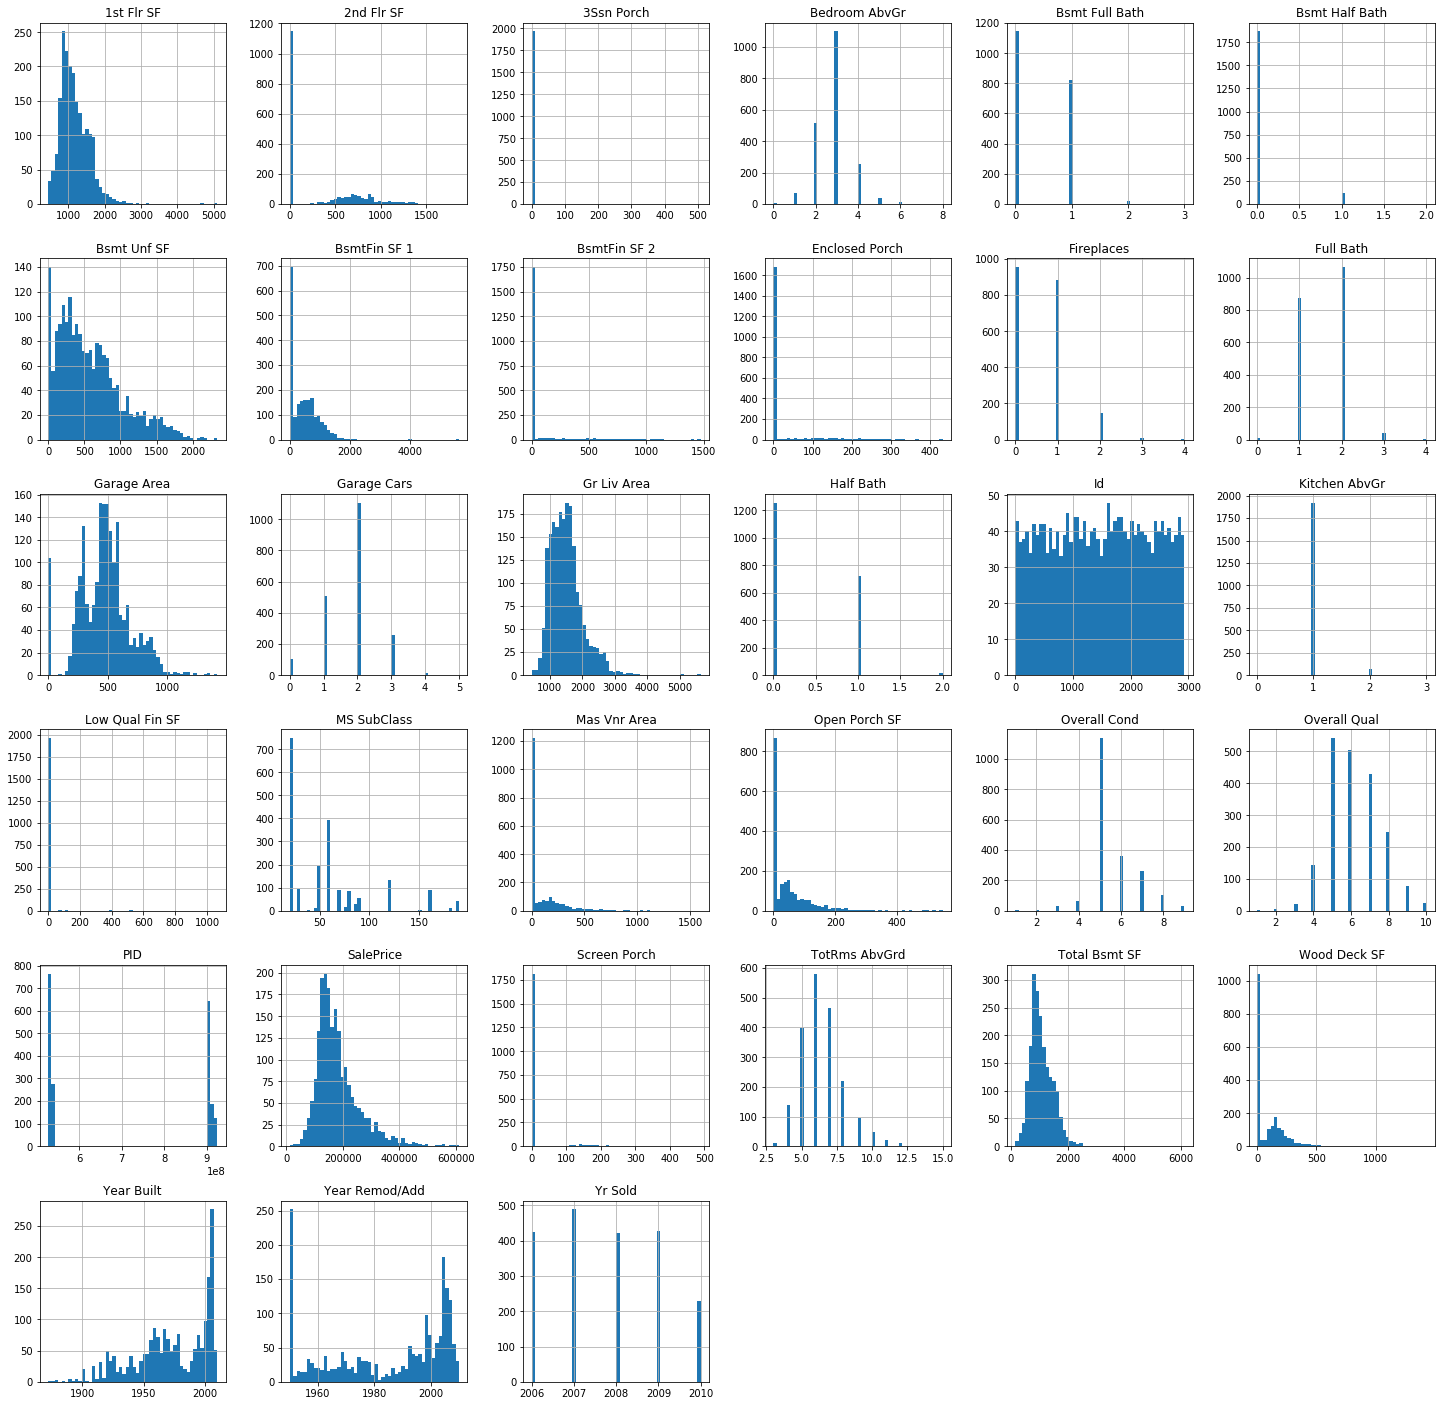

In [30]:
train.hist(bins=50, figsize=(25,25))
plt.savefig("attribute_histogram_plots")
plt.show()

**Boxplotting trouble histogram columns to better see outliers**

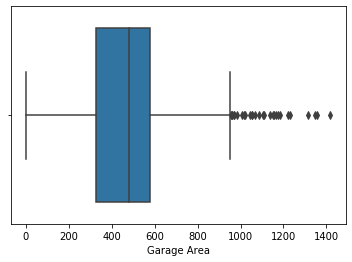

In [31]:
sns.boxplot(x=train['Garage Area']) 

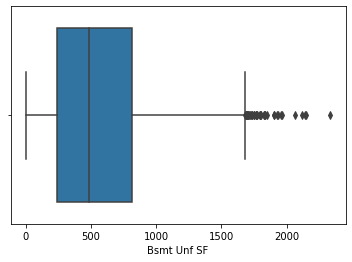

In [32]:
sns.boxplot(x=train['Bsmt Unf SF']) 

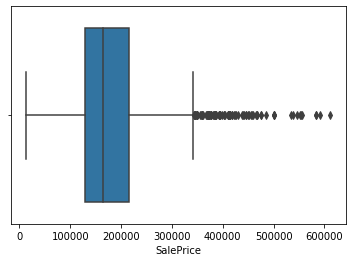

In [33]:
sns.boxplot(x=train['SalePrice'])

In [34]:
train['SalePrice'].describe()

count      1992.000000
mean     183451.543675
std       79049.128091
min       12789.000000
25%      130000.000000
50%      164945.000000
75%      215000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [35]:
find_outliers(129825, 214000, train['SalePrice'])

#total count 2051
#total upper outliers = 94

Lower outliers are: []
Upper outliers are: [341000, 342000, 342643, 344133, 345000, 345000, 345474, 348000, 349265, 350000, 350000, 350000, 350000, 355000, 356383, 359900, 360000, 360000, 361919, 367294, 370000, 370000, 370878, 370967, 372000, 372397, 372402, 373000, 374000, 375000, 376162, 377426, 377500, 380000, 382500, 383000, 383970, 385000, 385000, 386250, 387000, 392000, 392000, 392500, 394617, 395000, 395039, 398800, 402000, 403000, 404000, 410000, 410000, 410000, 412083, 412500, 415000, 415000, 415298, 417500, 418000, 421250, 425000, 426000, 430000, 438780, 440000, 441929, 445000, 446261, 450000, 451950, 455000, 457347, 460000, 465000, 466500, 468000, 475000, 475000, 485000, 500000, 500067, 501837, 535000, 538000, 545224, 552000, 555000, 556581, 582933, 584500, 591587, 611657]


Dont want to remove outliers as there are so many and TCB contracting will get jobs from houses with higher price points. Decision made to log salesprice before testing for more accutate results.

## Data Exploration: combining features and interaction terms 

In [36]:

train['TotalLivingSF'] = train['Gr Liv Area'] + train['Total Bsmt SF'] - train['Low Qual Fin SF']
test['TotalLivingSF'] = test['Gr Liv Area'] + test['Total Bsmt SF'] - test['Low Qual Fin SF']

In [37]:
#Creating SqFt + Quality column

train['SqFt Interaction Qual'] = train['TotalLivingSF'] * train['Overall Qual']
test['SqFt Interaction Qual'] = test['TotalLivingSF'] * test['Overall Qual']

In [38]:
#Creating Total Bath column

half_bath_total = (train['Bsmt Half Bath'] + train['Half Bath'])/2
train['TotalBath'] = train['Bsmt Full Bath'] + train['Full Bath'] + half_bath_total

half_bath_total = (test['Bsmt Half Bath'] + test['Half Bath'])/2
test['TotalBath'] = test['Bsmt Full Bath'] + test['Full Bath'] + half_bath_total

In [39]:
#Creating new df with TCB relevant features

TCB_df = train[['SalePrice','Overall Cond','Overall Qual','2nd Flr SF',
                      'Bedroom AbvGr','MS SubClass','House Style',
                      'Gr Liv Area','TotRms AbvGrd','Bsmt Cond', 
                      'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
                      'BsmtFin Type 2', 'BsmtFin SF 2','Kitchen AbvGr',
                      'Kitchen Qual', 'Bsmt Full Bath', 'Bsmt Half Bath',
                      'Full Bath', 'Half Bath','Garage Type',
                      'Garage Finish', 'Garage Cars','Garage Area', 'Garage Qual',
                      'Garage Cond','Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                      '3Ssn Porch', 'TotalBath','TotalLivingSF']].copy()

## Data Exploration: finding corrilations

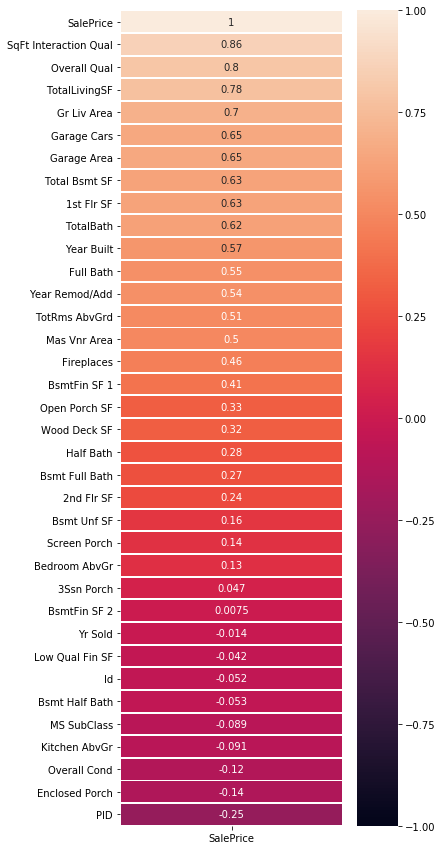

In [40]:
#Look at all corrilations to Sale Price

cor = train.corr()

plt.figure(figsize=(5,15))
sns.heatmap(cor[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1, 
            linecolor='white')

In [41]:
#code inspiration from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

cor_target = abs(cor['SalePrice'])
relevant_features = cor_target[cor_target > 0.5]
relevant_features.sort_values()

relevant_df = pd.DataFrame(relevant_features)

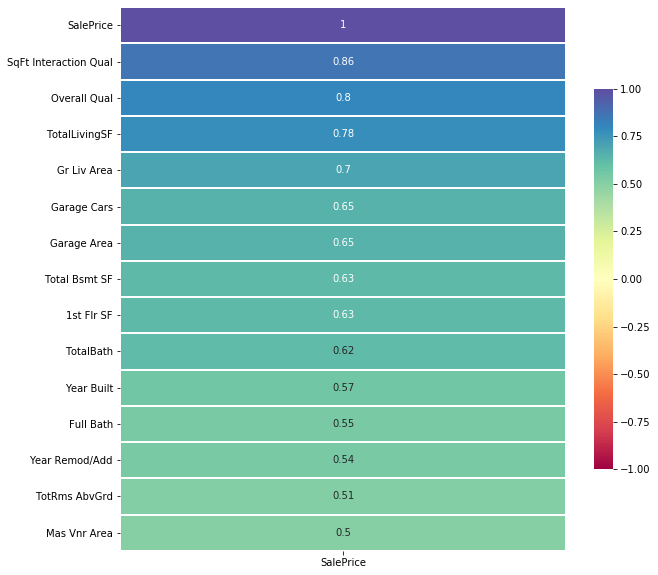

In [42]:
#Plotting relevant features

plt.figure(figsize=(10,10))
sns.heatmap(relevant_df.sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = "Spectral",
            linewidths=1, 
            linecolor='white',
            cbar_kws={"shrink": .70})

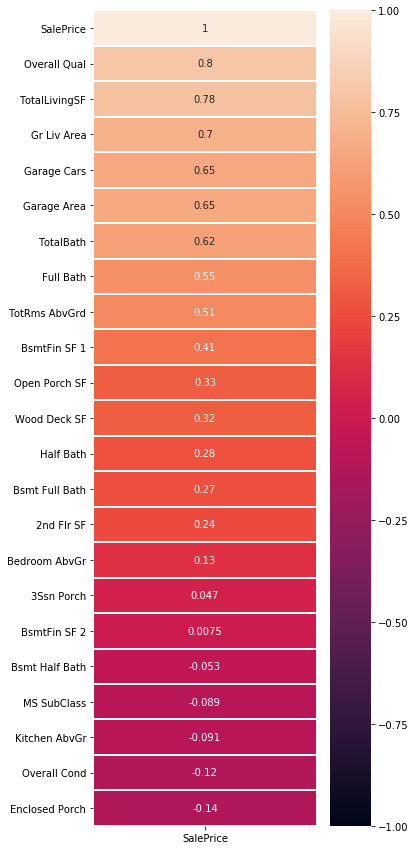

In [43]:
#Look at all corrilations to Sale Price

TCBcor = TCB_df.corr()

plt.figure(figsize=(5,15))
sns.heatmap(TCBcor[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1, 
            linecolor='white')

In [44]:
# Finding high corrilation features that contracting company can do

tcb_cor_target = abs(TCBcor['SalePrice'])
tcb_relevant_features = tcb_cor_target[tcb_cor_target > 0.5]
tcb_relevant_features.sort_values()

tcb_relevant_df = pd.DataFrame(tcb_relevant_features)

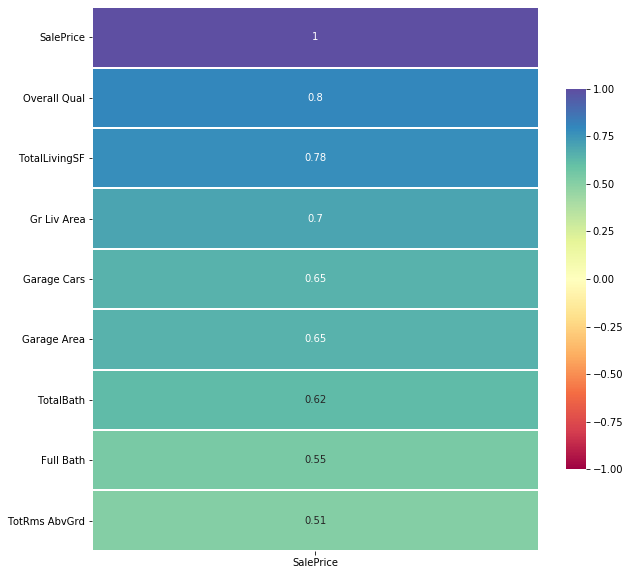

In [45]:
#Plotting relevant features

plt.figure(figsize=(10,10))
sns.heatmap(tcb_relevant_df.sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = "Spectral",
            linewidths=1, 
            linecolor='white',
            cbar_kws={"shrink": .70})

**Checking independance**

In [46]:
print(train[["Year Built","Year Remod/Add"]].corr())  
#High corrilation so I will drop one 
#Keep Year Build as it's corrilation with Sales Price is Higher

print(train[["Overall Qual","TotalLivingSF"]].corr())
#High corrilation so I will drop one 
#Keep Overall Qual as it's corrilation with Sales Price is Higher

print(train[["Garage Area","Garage Cars"]].corr())
#High corrilation so I will drop one 
#Keep Garage Area as it's corrilation with Sales Price is Higher

print(train[["1st Flr SF","Total Bsmt SF"]].corr())
#High corrilation so I will drop one 
#Keep Total Bsmt SF as it's corrilation with Sales Price is Higher

print(train[["TotalBath","Gr Liv Area"]].corr())
#High corrilation so I will drop one 
#Keep TotalBath as it's corrilation with Sales Price is Higher

                Year Built  Year Remod/Add
Year Built        1.000000        0.632592
Year Remod/Add    0.632592        1.000000
               Overall Qual  TotalLivingSF
Overall Qual       1.000000       0.639794
TotalLivingSF      0.639794       1.000000
             Garage Area  Garage Cars
Garage Area     1.000000     0.892032
Garage Cars     0.892032     1.000000
               1st Flr SF  Total Bsmt SF
1st Flr SF       1.000000       0.894571
Total Bsmt SF    0.894571       1.000000
             TotalBath  Gr Liv Area
TotalBath     1.000000     0.584645
Gr Liv Area   0.584645     1.000000


In [47]:
#High Independance
print(train[["Garage Area","Gr Liv Area"]].corr())
print(train[["Mas Vnr Area","Year Built"]].corr())

             Garage Area  Gr Liv Area
Garage Area     1.000000     0.486311
Gr Liv Area     0.486311     1.000000
              Mas Vnr Area  Year Built
Mas Vnr Area      1.000000    0.316717
Year Built        0.316717    1.000000


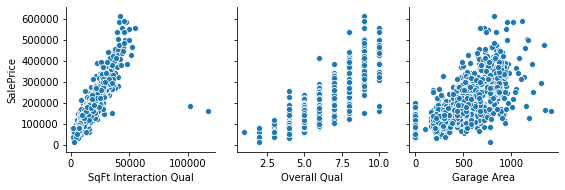

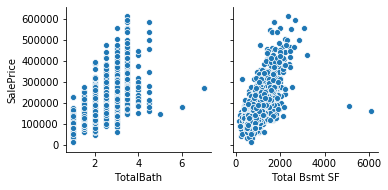

In [48]:
#Highest corrilations are SqFt Interaction Qual, Overall Qual, Garage Area, TotalBath,

sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['SqFt Interaction Qual', 'Overall Qual', 'Garage Area']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['TotalBath', 'Total Bsmt SF']);

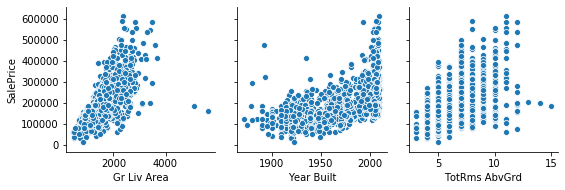

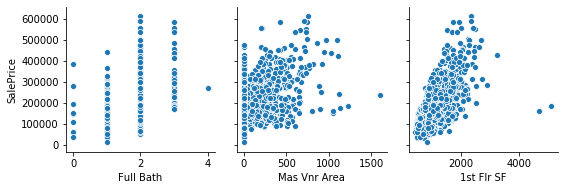

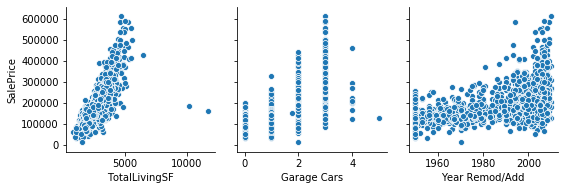

In [49]:
#others to check
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Gr Liv Area','Year Built','TotRms AbvGrd']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Full Bath', 'Mas Vnr Area','1st Flr SF']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['TotalLivingSF', 'Garage Cars','Year Remod/Add']);

In [50]:
print(TCB_df[['TotRms AbvGrd', 'Overall Qual']].corr()) #low corrilation
print(TCB_df[['Gr Liv Area', 'Garage Area']].corr()) #high corrilation, keep 'Gr Liv Area'
print(TCB_df[['Garage Cars', 'Gr Liv Area']].corr())  #low corrilation
print(TCB_df[['Full Bath', 'TotalBath']].corr()) #high corrilation, keep total bath

               TotRms AbvGrd  Overall Qual
TotRms AbvGrd       1.000000      0.391821
Overall Qual        0.391821      1.000000
             Gr Liv Area  Garage Area
Gr Liv Area     1.000000     0.486311
Garage Area     0.486311     1.000000
             Garage Cars  Gr Liv Area
Garage Cars     1.000000     0.483905
Gr Liv Area     0.483905     1.000000
           Full Bath  TotalBath
Full Bath   1.000000   0.712082
TotalBath   0.712082   1.000000


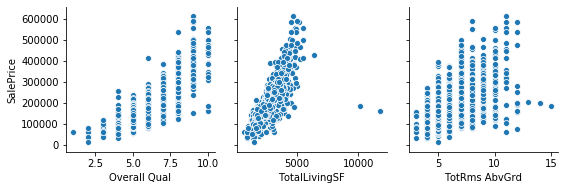

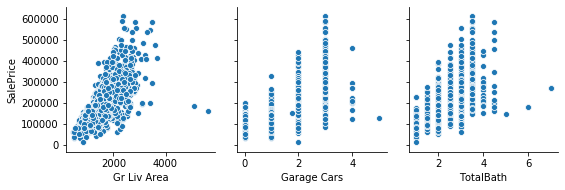

In [51]:
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Overall Qual', 'TotalLivingSF','TotRms AbvGrd']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Gr Liv Area','Garage Cars', 'TotalBath']);

In [53]:
train.head(2)

,Id,PID,MS SubClass,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Yr Sold,SalePrice,TotalLivingSF,SqFt Interaction Qual,TotalBath
0,109,533352170,60,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,NaN,2010,130500,2204.0,13224.0,2.5
1,544,531379050,60,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,NaN,2009,220000,3035.0,21245.0,3.5


In [ ]:
# TCB Relevant Features Left
# Overall Qual     0.800207
# TotalLivingSF    0.783108
# Gr Liv Area      0.697038
# Garage Cars      0.648197
# TotalBath        0.630098
# Garage Yr Blt    0.533922
# TotRms AbvGrd    0.504014

# Train Relevant Features Left: 
# SqFt Interaction Qual    0.863908
# Overall Qual             0.800207
# Garage Area              0.650246
# TotalBath                0.630098
# Total Bsmt SF            0.629303
# Year Built               0.571849
# Full Bath                0.537969
# Garage Yr Blt            0.533922
# TotRms AbvGrd            0.504014
# Mas Vnr Area             0.503579

#Decision to remove Overall Qual and SqFt Interaction Qual as TCB shoulnt promote 
#a full home renovation.

# Final Manual Feature Selection is
# TotalLivingSF    0.783108
# Gr Liv Area      0.697038
# Garage Cars      0.648197
# TotalBath        0.630098
# TotRms AbvGrd    0.504014


#Lets see how this compares to Lasso

# Pre Processing & Modeling

**Feature and Model Selection**

Features to score: Overall Qual, Total Living Sqft, Gr Liv Area, Garage Cars, TotalBath, TotRms AbvGrd.

As the output of my project will be the numeric 'Sale Price', I will use linear regression and multiple linear regression modeling algorithm to evaluate the data given to me. 

I will log salesprice before testing as there are so many outliers for more accutate results.
I will scale data as the units of measurements are different for the features chose. 

The success of my modeles will be evaluated by the regression metric 𝑅2. I will use R2 as it is easily interpratable and does not depend on the scale of "Sales Price".



**Dummy Columns**

In [54]:
train = pd.get_dummies(train, columns = ['House Style','Kitchen Qual','Bsmt Cond','BsmtFin Type 2','BsmtFin Type 1', 
                                        'Bsmt Exposure','Garage Type','Garage Finish','Garage Qual','Garage Cond'])

                                      
test = pd.get_dummies(test, columns = ['House Style','Kitchen Qual','Bsmt Cond','BsmtFin Type 2','BsmtFin Type 1',
                                       'Bsmt Exposure','Garage Type','Garage Finish','Garage Qual','Garage Cond'])

#Object Columns left: 'Fence','Paved Drive','Fireplace Qu','Exter Qual','Exter Cond','Roof Style','Roof Matl',
    #'Exterior 1st','Exterior 2nd','Mas Vnr Type'

In [ ]:
# Total Relevant Features Train: 
# Overall Qual             0.800207
# Year Built               0.571849
# Year Remod/Add           0.550370
# Mas Vnr Area             0.503579
# Total Bsmt SF            0.629303
# 1st Flr SF               0.618486
# Gr Liv Area              0.697038
# Full Bath                0.537969
# TotRms AbvGrd            0.504014
# Garage Yr Blt            0.533922
# Garage Cars              0.648197
# Garage Area              0.650246
# TotalLivingSF            0.783108
# SqFt Interaction Qual    0.863908
# TotalBath                0.630098

# Relevant Features Left Train: 
# SqFt Interaction Qual    0.863908
# Overall Qual             0.800207
# Garage Area              0.650246
# TotalBath                0.630098
# Total Bsmt SF            0.629303
# Year Built               0.571849
# Full Bath                0.537969
# Garage Yr Blt            0.533922
# TotRms AbvGrd            0.504014
# Mas Vnr Area             0.503579

# TCB Relevant Features
# Overall Qual     0.800207
# Gr Liv Area      0.697038
# TotRms AbvGrd    0.504014
# Full Bath        0.537969
# Garage Yr Blt    0.533922
# Garage Cars      0.648197
# Garage Area      0.650246
# TotalBath        0.630098
# TotalLivingSF    0.783108

# TCB Relevant Features Left
# Overall Qual     0.800207
# TotalLivingSF    0.783108
# Gr Liv Area      0.697038
# Garage Cars      0.648197
# TotalBath        0.630098
# Garage Yr Blt    0.533922
# TotRms AbvGrd    0.504014

**Initiate Model**

In [ ]:
#Manual Feature Selection
# TotalLivingSF    0.783108
# Gr Liv Area      0.697038
# Garage Cars      0.648197
# TotalBath        0.630098
# TotRms AbvGrd    0.504014

# X = train[['TotalLivingSF', 'Gr Liv Area', 'Garage Cars', 'TotalBath', 'TotRms AbvGrd']]
# y = train['SalePrice']
#Let's try more. Lasso didnt help

In [ ]:
#All TCB relevant Features
# Overall Qual     0.800207
# Gr Liv Area      0.697038
# TotRms AbvGrd    0.504014
# Full Bath        0.537969
# Garage Yr Blt    0.533922
# Garage Cars      0.648197
# Garage Area      0.650246
# TotalBath        0.630098
# TotalLivingSF    0.783108

# Lasso Kept All:'Overall Qual', 'Gr Liv Area', 'TotRms AbvGrd', 'Full Bath',
#        'Garage Cars', 'Garage Area', 'TotalBath', 'TotalLivingSF'

# Let's try even larger

X = train[['Overall Qual', 'Gr Liv Area', 'TotRms AbvGrd', 'Full Bath', 'Garage Cars', 'Garage Area', 'TotalBath', 'TotalLivingSF']]
y = train['SalePrice']



In [ ]:
# Overall Qual             0.800207
# Year Built               0.571849
# Year Remod/Add           0.550370
# Mas Vnr Area             0.503579
# Total Bsmt SF            0.629303
# 1st Flr SF               0.618486
# Gr Liv Area              0.697038
# Full Bath                0.537969
# TotRms AbvGrd            0.504014
# Garage Yr Blt            0.533922
# Garage Cars              0.648197
# Garage Area              0.650246
# TotalLivingSF            0.783108
# SqFt Interaction Qual    0.863908
# TotalBath                0.630098

# Lasso slightly better (0.7841206105394782, 0.8390127345414007) All df relevalt features
# 'Overall Qual', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
#        'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
#        'Garage Area', 'SqFt Interaction Qual', 'TotalBath'


features = ['Overall Qual','Mas Vnr Area','Total Bsmt SF','1st Flr SF','Gr Liv Area','Full Bath','TotRms AbvGrd',
           'Garage Cars','Garage Area','TotalLivingSF','SqFt Interaction Qual','TotalBath']

X = train[features]
y = train['SalePrice']

In [ ]:
# Lets try all TCB features: removed grageyear &

features = ['Overall Cond','Overall Qual','2nd Flr SF',
                      'Bedroom AbvGr','MS SubClass',
                      'Gr Liv Area','TotRms AbvGrd', 'BsmtFin SF 1','BsmtFin SF 2','Kitchen AbvGr',
                      'Bsmt Full Bath', 'Bsmt Half Bath',
                      'Full Bath', 'Half Bath',
                      'Garage Cars','Garage Area',
                      'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                      '3Ssn Porch', 'TotalBath','TotalLivingSF']

#Object Types
# 'BsmtFin Type 1'
# 'BsmtFin Type 2'
# 'Bsmt Cond'
# 'House Style'
# 'Bsmt Exposure'
# 'Kitchen Qual'
# 'Garage Type'
# 'Garage Finish'
# 'Garage Qual'
# 'Garage Cond'

'Fence','Paved Drive','Fireplace Qu','Exter Qual','Exter Cond','Roof Style','Roof Matl',
    #'Exterior 1st','Exterior 2nd','Mas Vnr Type'
1Story



In [56]:
#All numeric columns
X = train._get_numeric_data().drop(columns='SalePrice')

y = train['SalePrice']

In [ ]:
#train['SalePrice'] = train['SalePrice'].map(np.log)

In [ ]:
#X = train[['Overall Qual']]

In [ ]:
#X = train[['TotalLivingSF']]

In [ ]:
#X = train[['Gr Liv Area', 'Garage Cars']]

In [ ]:
#X = train[['Gr Liv Area']]

In [ ]:
#X = train[['Garage Cars']]

In [ ]:
#X = train[['TotalBath']]

In [ ]:
#X = train[['TotRms AbvGrd']]

**Train/test split data**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Scale data**

In [ ]:
# y_train_log = y_train.map(np.log)
# y_test_log = y_test.map(np.log)

In [58]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Instantiate and fit**

In [59]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(Xs_train, y_train)

# lr = LinearRegression()
# lr.fit(X_train,  y_train_log)

#lr.fit(Xs_train,  y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluate Model**

In [60]:
# lr.score(X_train, y_train) 
#0.7710019941008703

lr.score(Xs_train, y_train)
0.7710019941008704

# lr.score(X_train, y_train_log)
#0.8000960714055056

# lr.score(Xs_train, y_train_log)
#0.8000960714055056

#TCBALL0.7710019941008704

#All0.7710019941008704

0.7710019941008704

In [61]:
# lr.score(X_test, y_test)
#0.8167458961515633

lr.score(X_test, y_test)
#0.8167458961515706

# lr.score(X_test, y_test_log)
#0.8002402971733166

#lr.score(X_test, y_test_log)
#0.8002402971733233

#TCBAll 0.8226400933117244

#All-1.0558701339924738e+23

-1.0558701339924738e+23

In [62]:
# cross_val_score(lr,X_train, y_train).mean() 
#0.7547645392833602

cross_val_score(lr,Xs_train, y_train).mean() 
#0.7547645392833615

# cross_val_score(lr, X_train, y_train_log).mean()
#0.7887774127694354

# cross_val_score(lr, Xs_train, y_train_log).mean()
#0.7887774127694364

#TCBAll 0.7542193473817391


All-1.853594673486409e+19


-1.853594673486409e+19

In [63]:
pd.DataFrame({
    'var': X.columns,
    'coef val': lr.coef_
}).set_index('var').sort_values('coef val')

,coef val
var,
Kitchen Qual_TA,-4.794434e+16
Kitchen Qual_Gd,-4.714343e+16
TotalLivingSF,-3.134082e+16
TotalBath,-2.459887e+16
Kitchen Qual_Ex,-2.429419e+16
Total Bsmt SF,-1.939316e+16
Garage Finish_Unf,-1.864206e+16
Garage Finish_RFn,-1.703496e+16
Garage Finish_Fin,-1.674799e+16


In [64]:
sum(lr.coef_)

3.9585864518142874e+17

**LASSO Regression**

In [65]:
from sklearn.linear_model import Lasso, LassoCV

In [71]:
lasso = Lasso(alpha=282) # default alpha
lasso.fit(Xs_train, y_train)
lasso.score(Xs_train, y_train), lasso.score(X_test, y_test)

(0.8506604942948295, 0.8780077036791422)

(0.8506604942948295, 0.8780077036791422)

In [67]:
pd.DataFrame({
    'var': X.columns,
    'coef val': lasso.coef_
}).set_index('var').sort_values('coef val', ascending=False)

,coef val
var,
Overall Qual,21045.790112
Kitchen Qual_Ex,11857.556901
Gr Liv Area,10462.550247
TotalLivingSF,9354.339594
Garage Cars,6524.811938
TotalBath,4941.434231
Year Built,4893.466772
Garage Area,4130.026125
Bsmt Exposure_Gd,4126.111010


In [68]:
coef_df = pd.DataFrame({
    'var': X.columns,
    'coef val': lasso.coef_
})
coef_df[coef_df['coef val'] != 0]['var'].values

array(['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
       'TotalLivingSF', 'SqFt Interaction Qual', 'TotalBath',
       'Kitchen Qual_Ex', 'Kitchen Qual_TA', 'BsmtFin Type 2_Unf',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_Unf', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_No', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_N/A', 'Garage Finish_Fin',
       'Garage Finish_N/A', 'Garage Finish_Unf', 'Garage Qual_Gd',
       'Garage Qual_N/A', 'Garage Cond_N/A'], dtype=object)

In [69]:
lcv = LassoCV()
lcv.fit(Xs_train, y_train)
lcv.score(Xs_train, y_train), lcv.score(X_test, y_test)

(0.8506562144113572, 0.8780122434125204)

In [70]:
lcv.alpha_

282.5643759965872

In [ ]:
#how do to exp back to interpret
Xs_train = np.exp(Xs_train)
X_test = np.exp(X_test)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

In [ ]:
pred = lr.predict(X_test)
pred= np.exp(pred)
pred

In [ ]:
#pd.DataFrame(zip(X.columns, lr.coef_))
pd.DataFrame(zip(np.exp(X.columns), np.exp(lr.coef_)))

Holding all else constant:

For every additional bath a home owner can expect the value of their home to increase $12844/ $10445(scaled) /(log)

For every additional room created above ground a home owner can expect the value of their home to increase $917 / $1432(scaled) / (log)

For ever additional car a home owner can fit in their garage the value of their home can increase $15653, $11964(scaled), (log)

**Make Predictions**

In [ ]:
lr.predict(X_test)

In [ ]:
X.head()

In [ ]:
test.head(2)